__This script visualizes the temporal development of the SimMod transient temperature response and compares it to the CMIP5 average. It further compares it to the equilibrium temperature response.__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 25
import pandas as pd

In [2]:
CMIP_PATH = "../data/preprocessed/"
SIMMOD_PATH = "../../SimMod/results/"
SIMMOD_TAG_85 = "200828-112329-pulse_response-rcp85"
SIMMOD_TAG_60 = "200828-112347-pulse_response-rcp60"
SIMMOD_TAG_45 = "200828-112406-pulse_response-rcp45"
SIMMOD_TAG_26 = "200828-112429-pulse_response-rcp26"

In [13]:
# Baseline [BL, BU]
BL = 1961
BU = 1990

# Read SimMod data
simmod85 = pd.read_csv(SIMMOD_PATH+SIMMOD_TAG_85+"/results.csv")
simmod60 = pd.read_csv(SIMMOD_PATH+SIMMOD_TAG_60+"/results.csv")
simmod45 = pd.read_csv(SIMMOD_PATH+SIMMOD_TAG_45+"/results.csv")
simmod26 = pd.read_csv(SIMMOD_PATH+SIMMOD_TAG_26+"/results.csv")

# Normalize to baseline
simmod85['t_s'] = simmod85['t_s']-simmod85[(simmod85['year']>=BL) & (simmod85['year']<=BU)]['t_s'].mean()
simmod60['t_s'] = simmod60['t_s']-simmod60[(simmod60['year']>=BL) & (simmod60['year']<=BU)]['t_s'].mean()
simmod45['t_s'] = simmod45['t_s']-simmod45[(simmod45['year']>=BL) & (simmod45['year']<=BU)]['t_s'].mean()
simmod26['t_s'] = simmod26['t_s']-simmod26[(simmod26['year']>=BL) & (simmod26['year']<=BU)]['t_s'].mean()

simmod85['t_eq'] = simmod85['t_eq']-simmod85[(simmod85['year']>=BL) & (simmod85['year']<=BU)]['t_eq'].mean()
simmod60['t_eq'] = simmod60['t_eq']-simmod60[(simmod60['year']>=BL) & (simmod60['year']<=BU)]['t_eq'].mean()
simmod45['t_eq'] = simmod45['t_eq']-simmod45[(simmod45['year']>=BL) & (simmod45['year']<=BU)]['t_eq'].mean()
simmod26['t_eq'] = simmod26['t_eq']-simmod26[(simmod26['year']>=BL) & (simmod26['year']<=BU)]['t_eq'].mean()

In [14]:
CMIP5 = pd.read_csv(CMIP_PATH+"CMIP5_TAnom.csv", skiprows=6)

# Normalize to baseline
CMIP5['rcp26'] = CMIP5['rcp26']-CMIP5[(CMIP5['year']>=BL) & (CMIP5['year']<=BU)]['rcp26'].mean()
CMIP5['rcp45'] = CMIP5['rcp45']-CMIP5[(CMIP5['year']>=BL) & (CMIP5['year']<=BU)]['rcp45'].mean()
CMIP5['rcp60'] = CMIP5['rcp60']-CMIP5[(CMIP5['year']>=BL) & (CMIP5['year']<=BU)]['rcp60'].mean()
CMIP5['rcp85'] = CMIP5['rcp85']-CMIP5[(CMIP5['year']>=BL) & (CMIP5['year']<=BU)]['rcp85'].mean()

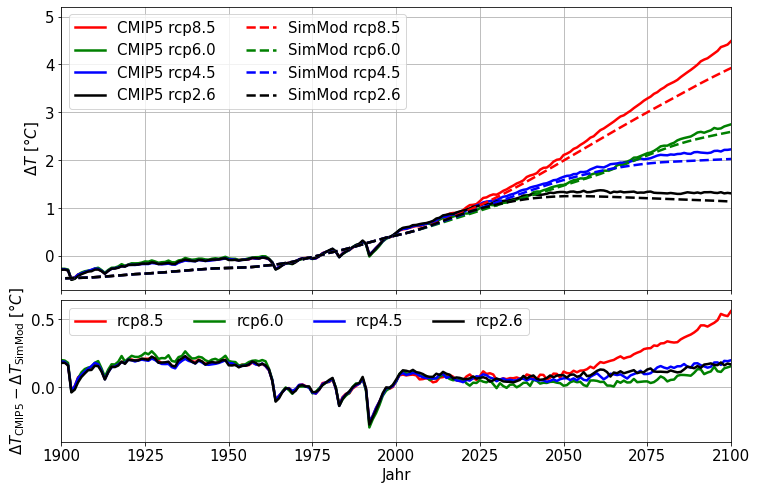

In [6]:
plt.rcParams['font.size'] = 15

# X-Limits of the plot
XLIM = (1900, 2100)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8), sharex=True,
                               gridspec_kw=dict(height_ratios=[2/3, 1/3], hspace=0.05))

ax1.plot(CMIP5['year'], CMIP5['rcp85'], label='CMIP5 rcp8.5', lw=2.5, c='r')
ax1.plot(CMIP5['year'], CMIP5['rcp60'], label='CMIP5 rcp6.0', lw=2.5, c='g')
ax1.plot(CMIP5['year'], CMIP5['rcp45'], label='CMIP5 rcp4.5', lw=2.5, c='b')
ax1.plot(CMIP5['year'], CMIP5['rcp26'], label='CMIP5 rcp2.6', lw=2.5, c='k')

ax1.plot(simmod85['year'], simmod85['t_s'], label='SimMod rcp8.5', c='r', ls='dashed', lw=2.5)
ax1.plot(simmod60['year'], simmod60['t_s'], label='SimMod rcp6.0', c='g', ls='dashed', lw=2.5)
ax1.plot(simmod45['year'], simmod45['t_s'], label='SimMod rcp4.5', c='b', ls='dashed', lw=2.5)
ax1.plot(simmod26['year'], simmod26['t_s'], label='SimMod rcp2.6', c='k', ls='dashed', lw=2.5)

ax1.set_xlim(*XLIM)
ax1.set_ylim(-0.7, 5.2)

times_simmod = (simmod85['year']>=XLIM[0]) & (simmod85['year']<=XLIM[1])
times_cmip5 = (CMIP5['year']>=XLIM[0]) & (CMIP5['year']<=XLIM[1])
CMIP5_temp = CMIP5[times_cmip5].reset_index()
simmod26_temp = simmod26[times_simmod].reset_index()
simmod45_temp = simmod45[times_simmod].reset_index()
simmod60_temp = simmod60[times_simmod].reset_index()
simmod85_temp = simmod85[times_simmod].reset_index()

ax2.plot(simmod85_temp['year'], -(simmod85_temp['t_s']-CMIP5_temp['rcp85']), lw=2.5, c='r', label='rcp8.5')
ax2.plot(simmod60_temp['year'], -(simmod60_temp['t_s']-CMIP5_temp['rcp60']), lw=2.5, c='g', label='rcp6.0')
ax2.plot(simmod45_temp['year'], -(simmod45_temp['t_s']-CMIP5_temp['rcp45']), lw=2.5, c='b', label='rcp4.5')
ax2.plot(simmod26_temp['year'], -(simmod26_temp['t_s']-CMIP5_temp['rcp26']), lw=2.5, c='k', label='rcp2.6')
ax2.set_ylim(-0.4,0.64)
ax1.grid()
ax2.grid()
ax2.set_xlabel("Jahr")
ax2.set_ylabel(r"$\Delta T_{\mathrm{CMIP5}}-\Delta T_{\mathrm{SimMod}}$ $[\degree C]$")
ax1.set_ylabel(r"$\Delta T$ $[\degree C]$")
ax1.legend(ncol=2)
ax2.legend(ncol=4, loc='upper left')

#plt.savefig("figures/T_CMIP_SimMod.pdf", bbox_inches='tight')
plt.show()
plt.rcParams['font.size'] = 25

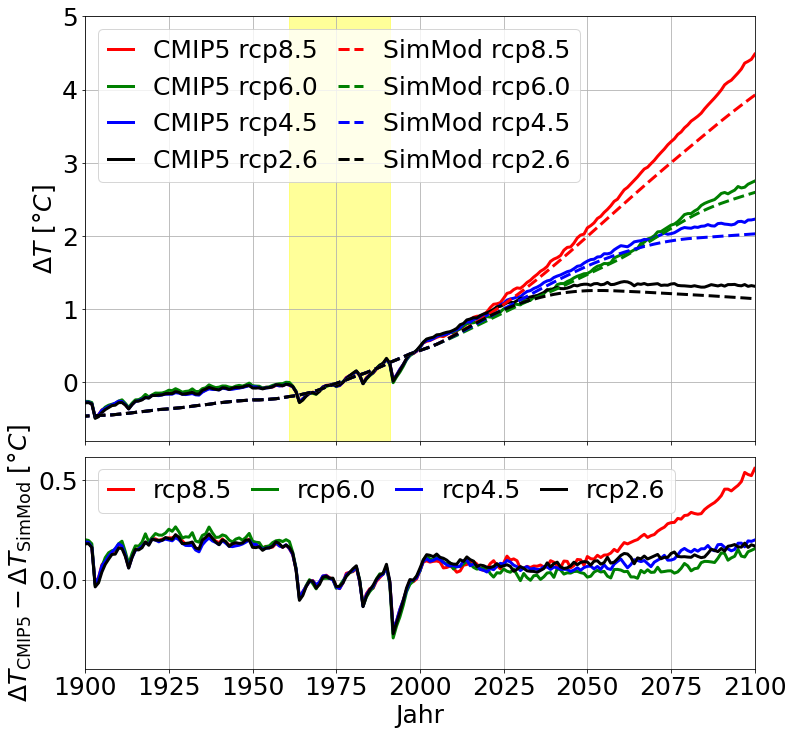

In [15]:
####################
## Baseline Plots ##
####################

# X-Limits of the plot
XLIM = (1900, 2100)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,12), sharex=True,
                               gridspec_kw=dict(height_ratios=[2/3, 1/3], hspace=0.05))

ax1.plot(CMIP5['year'], CMIP5['rcp85'], label='CMIP5 rcp8.5', lw=3, c='r')
ax1.plot(CMIP5['year'], CMIP5['rcp60'], label='CMIP5 rcp6.0', lw=3, c='g')
ax1.plot(CMIP5['year'], CMIP5['rcp45'], label='CMIP5 rcp4.5', lw=3, c='b')
ax1.plot(CMIP5['year'], CMIP5['rcp26'], label='CMIP5 rcp2.6', lw=3, c='k')

ax1.plot(simmod85['year'], simmod85['t_s'], label='SimMod rcp8.5', c='r', ls='dashed', lw=3)
ax1.plot(simmod60['year'], simmod60['t_s'], label='SimMod rcp6.0', c='g', ls='dashed', lw=3)
ax1.plot(simmod45['year'], simmod45['t_s'], label='SimMod rcp4.5', c='b', ls='dashed', lw=3)
ax1.plot(simmod26['year'], simmod26['t_s'], label='SimMod rcp2.6', c='k', ls='dashed', lw=3)

ax1.fill_betweenx(y=[-1.,5], x1=BL, x2=BU+1, color='yellow', alpha=0.4)
ax1.set_xlim(*XLIM)
ax1.set_ylim(-0.8, 5)

times_simmod = (simmod85['year']>=XLIM[0]) & (simmod85['year']<=XLIM[1])
times_cmip5 = (CMIP5['year']>=XLIM[0]) & (CMIP5['year']<=XLIM[1])
CMIP5_temp = CMIP5[times_cmip5].reset_index()
simmod26_temp = simmod26[times_simmod].reset_index()
simmod45_temp = simmod45[times_simmod].reset_index()
simmod60_temp = simmod60[times_simmod].reset_index()
simmod85_temp = simmod85[times_simmod].reset_index()

ax2.plot(simmod85_temp['year'], -(simmod85_temp['t_s']-CMIP5_temp['rcp85']), lw=3, c='r', label='rcp8.5')
ax2.plot(simmod60_temp['year'], -(simmod60_temp['t_s']-CMIP5_temp['rcp60']), lw=3, c='g', label='rcp6.0')
ax2.plot(simmod45_temp['year'], -(simmod45_temp['t_s']-CMIP5_temp['rcp45']), lw=3, c='b', label='rcp4.5')
ax2.plot(simmod26_temp['year'], -(simmod26_temp['t_s']-CMIP5_temp['rcp26']), lw=3, c='k', label='rcp2.6')
ax2.set_ylim(-0.45,0.62)
ax1.grid()
ax2.grid()
ax2.set_xlabel("Jahr")
ax2.set_ylabel(r"$\Delta T_{\mathrm{CMIP5}}-\Delta T_{\mathrm{SimMod}}$ $[\degree C]$")
ax1.set_ylabel(r"$\Delta T$ $[\degree C]$")
ax1.legend(ncol=2, handlelength=1, columnspacing=0.8)
ax2.legend(ncol=4, loc='upper left', handlelength=1, columnspacing=0.8)

#plt.savefig("figures/T_CMIP_SimMod_Base1961-1990.pdf", bbox_inches='tight')
#plt.savefig("figures/T_CMIP_SimMod_Base1900-1999.pdf", bbox_inches='tight')
plt.show()

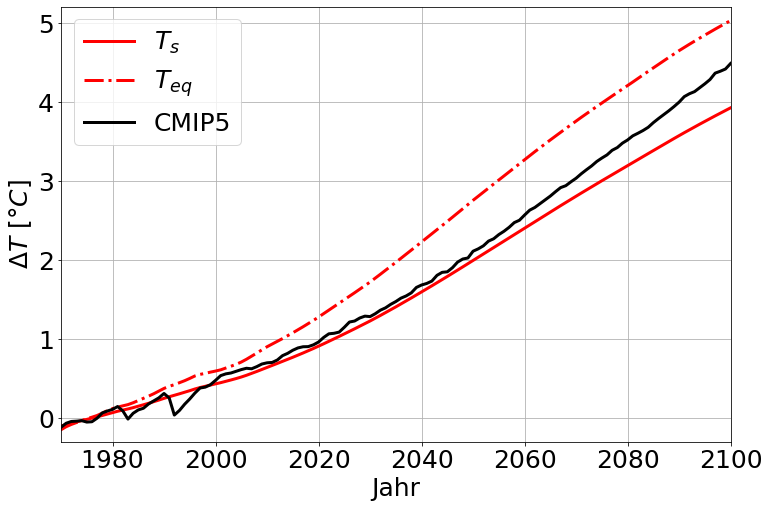

In [16]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(simmod85['year'], simmod85['t_s'], c='r', lw=3, label=r'$T_s$')
ax.plot(simmod85['year'], simmod85['t_eq'], c='r', lw=3, ls='-.', label=r'$T_{eq}$')
ax.plot(CMIP5['year'], CMIP5['rcp85'], lw=3, c='k', label='CMIP5')

ax.set_xlim(1970, 2100)
ax.set_ylim(-0.3, 5.2)
ax.grid()
ax.legend()
ax.set_xlabel("Jahr")
ax.set_ylabel(r"$\Delta T$ $[\degree C]$")
ax.set_axisbelow(True)

#plt.savefig("figures/T_CMIP_SimMod_rcp85.pdf", bbox_inches='tight')
plt.show()

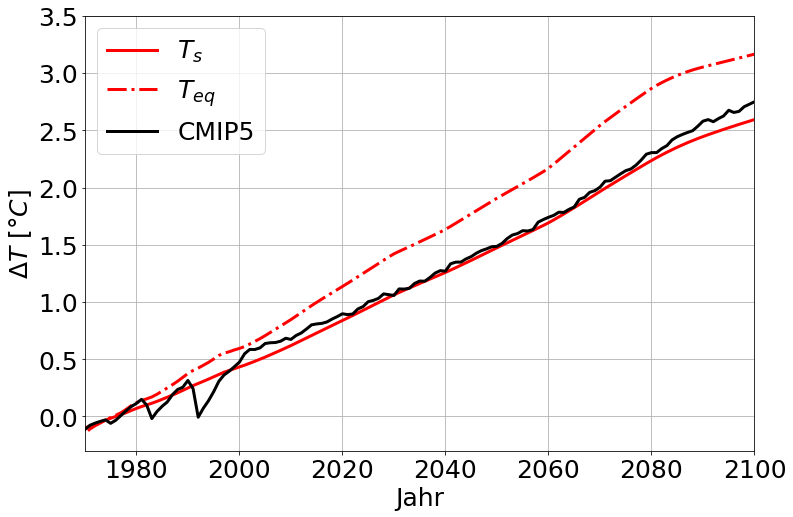

In [17]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(simmod60['year'], simmod60['t_s'], c='r', lw=3, label=r'$T_s$')
ax.plot(simmod60['year'], simmod60['t_eq'], c='r', lw=3, ls='-.', label=r'$T_{eq}$')
ax.plot(CMIP5['year'], CMIP5['rcp60'], lw=3, c='k', label='CMIP5')

ax.set_xlim(1970, 2100)
ax.set_ylim(-0.3, 3.5)
ax.grid()
ax.legend()
ax.set_xlabel("Jahr")
ax.set_ylabel(r"$\Delta T$ $[\degree C]$")
ax.set_axisbelow(True)

#plt.savefig("figures/T_CMIP_SimMod_rcp60.pdf", bbox_inches='tight')
plt.show()

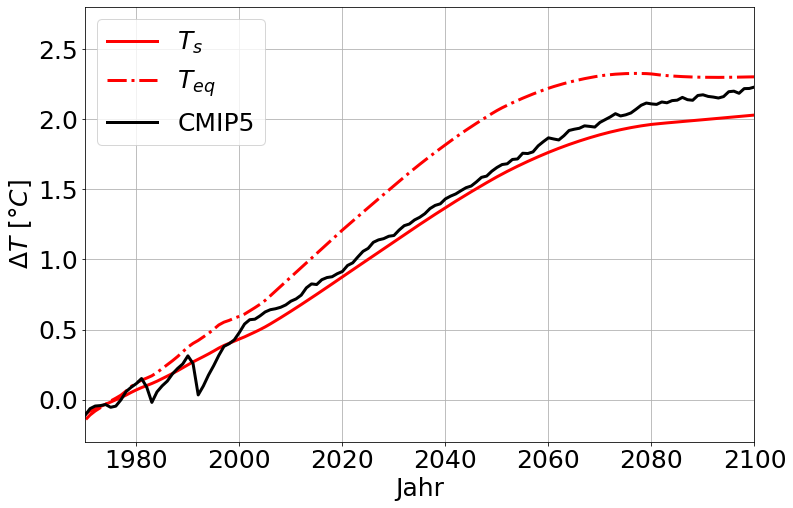

In [18]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(simmod45['year'], simmod45['t_s'], c='r', lw=3, label=r'$T_s$')
ax.plot(simmod45['year'], simmod45['t_eq'], c='r', lw=3, ls='-.', label=r'$T_{eq}$')
ax.plot(CMIP5['year'], CMIP5['rcp45'], lw=3, c='k', label='CMIP5')

ax.set_xlim(1970, 2100)
ax.set_ylim(-0.3, 2.8)
ax.grid()
ax.legend()
ax.set_xlabel("Jahr")
ax.set_ylabel(r"$\Delta T$ $[\degree C]$")
ax.set_axisbelow(True)

#plt.savefig("figures/T_CMIP_SimMod_rcp45.pdf", bbox_inches='tight')
plt.show()

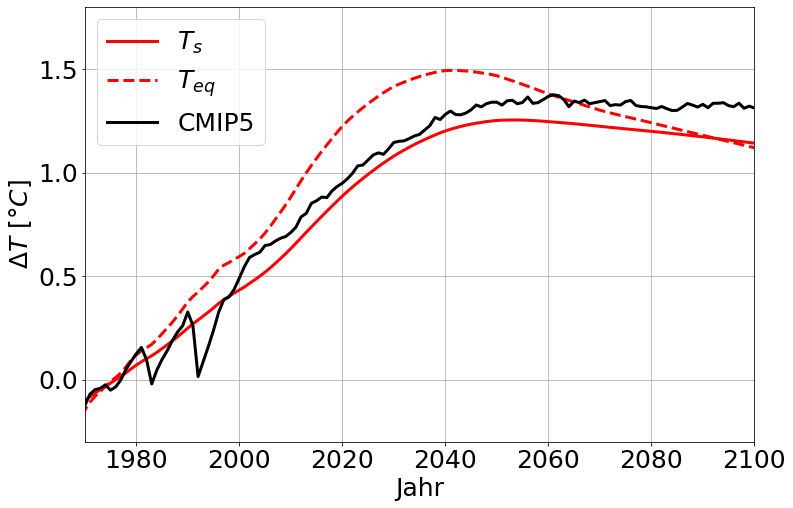

In [19]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(simmod26['year'], simmod26['t_s'], c='r', lw=3, label=r'$T_s$')
ax.plot(simmod26['year'], simmod26['t_eq'], c='r', lw=3, ls='--', label=r'$T_{eq}$')
ax.plot(CMIP5['year'], CMIP5['rcp26'], lw=3, c='k', label='CMIP5')

ax.set_xlim(1970, 2100)
ax.set_ylim(-0.3, 1.8)
ax.grid()
ax.legend(loc='upper left')
ax.set_xlabel("Jahr")
ax.set_ylabel(r"$\Delta T$ $[\degree C]$")
ax.set_axisbelow(True)

#plt.savefig("figures/T_CMIP_SimMod_rcp26.pdf", bbox_inches='tight')
plt.show()